In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from astropy.io import ascii
from astropy.table import Table
import csv

In [2]:
cadence=26
t_list_years=[200,220,220.5,221,221.5,222,222.5,223,223.5,224,224.5,225]
t_list_cadence=[int(i*cadence) for i in t_list_years]
run=50
cluster_size=2000
steps=7800

## percent mass- 2000 stars- 1 burst

In [3]:
L2000=np.load('/home/lee/data/cluster_size_change/100x_burst/L2000.npy')

cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==5:
                    obs_burst2000[i,k,j-30:j]=1
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==5:
                    obs_burst2000[i,k,j:j+30]=1

num100_2000=0
list100_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==1:
                num100_2000+=1
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list100_2000.append(num100_2000)
    num100_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

mass100_2000=[]
mass0_2000=[]
for i in range(run):
    mass100_2000.append(list100_2000[i]*100)
    mass0_2000.append(list0_2000[i]*1)

frac100_2000_1bin=[]
frac0_2000_1bin=[]
for i in range(run):
    total2000=mass100_2000[i]+mass0_2000[i]
    frac100_2000_1bin.append(100*mass100_2000[i]/total2000)
    frac0_2000_1bin.append(100*mass0_2000[i]/total2000)

In [4]:
mean2000_obs=np.mean(frac100_2000_1bin)
std2000_obs=np.std(frac0_2000_1bin)
string2000meanObs='{:.2f}%'.format(mean2000_obs)
string2000stdObs='{:.2f}%'.format(std2000_obs)

## percent mass- 2000 stars- 5 bins

In [5]:
L2000=np.load('/home/lee/data/2000stars_only/L2000_5.npy')

#100
cluster_size2000=2000
cad_L2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for j in range(cluster_size2000):
        for k in range(len(t_list_cadence)):
            cad_L2000[i,j,k]=L2000[i,j,t_list_cadence[k]]

obs_burst2000=np.zeros((run,cluster_size2000,12))
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==5:
                    obs_burst2000[i,k,j-30:j]=100
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==5:
                    obs_burst2000[i,k,j:j+30]=100


#40
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-1]=40
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=40
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=1
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==4:
                    obs_burst2000[i,k,j-6:j]=40
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==4:
                    obs_burst2000[i,k,j:j+6]=40

#16 
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-1]=16
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=16
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=16
            else:
                if cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==3:
                    obs_burst2000[i,k,j:j+2]=16
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==3:
                    obs_burst2000[i,k,j-2:j]=16

#3
for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==1.25:
                obs_burst2000[i,k,j-1]=3
            elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==1.25:
               obs_burst2000[i,k,j]=3

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(1,12):
            if j==1:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-1]=6
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    if cad_L2000[i,k,j]!=cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j]=6
                    elif cad_L2000[i,k,j]==cad_L2000[i,k,j+1]:
                        obs_burst2000[i,k,j:j+2]=6
            else:
                if cad_L2000[i,k,j]-cad_L2000[i,k,j-1]==2:
                    obs_burst2000[i,k,j-6:j]=6
                    obs_burst2000[i,k,0]=0
                elif cad_L2000[i,k,j-1]-cad_L2000[i,k,j]==2:
                    obs_burst2000[i,k,j:j+6]=6
                    print(i,k)

0 6
0 52
0 53
0 57
0 100
0 126
0 241
0 262
0 264
0 266
0 291
0 313
0 323
0 358
0 372
0 373
0 403
0 415
0 552
0 558
0 578
0 582
0 616
0 630
0 645
0 675
0 737
0 743
0 747
0 756
0 767
0 780
0 790
0 849
0 851
0 865
0 880
0 893
0 905
0 942
0 953
0 1006
0 1041
0 1054
0 1061
0 1075
0 1080
0 1100
0 1104
0 1118
0 1132
0 1144
0 1162
0 1187
0 1206
0 1213
0 1237
0 1293
0 1323
0 1337
0 1351
0 1380
0 1389
0 1407
0 1439
0 1444
0 1465
0 1472
0 1480
0 1487
0 1495
0 1509
0 1512
0 1530
0 1574
0 1581
0 1603
0 1611
0 1636
0 1671
0 1685
0 1713
0 1730
0 1731
0 1751
0 1779
0 1839
0 1848
0 1865
0 1902
0 1946
0 1949
1 19
1 58
1 75
1 122
1 144
1 157
1 173
1 212
1 223
1 264
1 310
1 317
1 327
1 373
1 392
1 396
1 406
1 458
1 469
1 495
1 504
1 506
1 526
1 534
1 538
1 544
1 564
1 612
1 613
1 707
1 716
1 752
1 810
1 812
1 820
1 883
1 897
1 916
1 999
1 1002
1 1008
1 1015
1 1039
1 1104
1 1163
1 1178
1 1248
1 1254
1 1263
1 1305
1 1332
1 1335
1 1346
1 1393
1 1401
1 1406
1 1455
1 1458
1 1468
1 1474
1 1486
1 1491
1 1567
1 1

In [6]:
num3_2000=0
list3_2000=[]
num6_2000=0
list6_2000=[]
num16_2000=0
list16_2000=[]
num40_2000=0
list40_2000=[]
num100_2000=0
list100_2000=[]
num0_2000=0
list0_2000=[]

for i in range(run):
    for k in range(cluster_size2000):
        for j in range(0,12):
            if obs_burst2000[i,k,j]==3:
                num3_2000+=1
            elif obs_burst2000[i,k,j]==6:
                num6_2000+=1 
            elif obs_burst2000[i,k,j]==16:
                num16_2000+=1 
            elif obs_burst2000[i,k,j]==40:
                num40_2000+=1 
            elif obs_burst2000[i,k,j]==100:
                num100_2000+=1 
            elif obs_burst2000[i,k,j]==0:
                num0_2000+=1
    list3_2000.append(num3_2000)
    num3_2000=0
    list6_2000.append(num6_2000)
    num6_2000=0
    list16_2000.append(num16_2000)
    num16_2000=0
    list40_2000.append(num40_2000)
    num40_2000=0
    list100_2000.append(num100_2000)
    num100_2000=0
    list0_2000.append(num0_2000)
    num0_2000=0

In [7]:
mass3_2000=[]
mass6_2000=[]
mass16_2000=[]
mass40_2000=[]
mass100_2000=[]
mass0_2000=[]
for i in range(run):
    mass3_2000.append(list3_2000[i]*3)
    mass6_2000.append(list6_2000[i]*6)
    mass16_2000.append(list16_2000[i]*16)
    mass40_2000.append(list40_2000[i]*40)
    mass100_2000.append(list100_2000[i]*100)
    mass0_2000.append(list0_2000[i]*1)

In [8]:
frac3_2000=[]
frac6_2000=[]
frac16_2000=[]
frac40_2000=[]
frac100_2000=[]
frac0_2000=[]
burst_frac=[]
for i in range(run):
    total2000=mass3_2000[i]+mass6_2000[i]+mass16_2000[i]+mass40_2000[i]+mass100_2000[i]+mass0_2000[i]
    frac3_2000.append(100*mass3_2000[i]/total2000)
    frac6_2000.append(100*mass6_2000[i]/total2000)
    frac16_2000.append(100*mass16_2000[i]/total2000)
    frac40_2000.append(100*mass40_2000[i]/total2000)
    frac100_2000.append(100*mass100_2000[i]/total2000)
    frac0_2000.append(100*mass0_2000[i]/total2000)
    burst_frac.append(frac3_2000[i]+frac6_2000[i]+frac16_2000[i]+frac40_2000[i]+frac100_2000[i])

In [9]:
print(burst_frac)

[48.76441515650741, 39.527214277796254, 46.38564624003554, 42.403201441708845, 43.10241042686278, 42.70443894476332, 47.54316069057105, 44.07832023702177, 46.07050773502578, 50.24064906490649, 44.626922588025934, 44.35622262633507, 41.61129346462786, 47.549495341614914, 46.70788933424577, 44.14740626605033, 44.19821483533395, 48.08592343693748, 46.35365129625965, 42.7970336085836, 49.20642374154771, 45.13050941586308, 43.86472182780432, 44.2410059917196, 46.607125282944594, 47.67901949430612, 45.49074607428185, 45.76271186440679, 46.47828232971372, 47.52960590176665, 45.06721348826612, 44.20081229756825, 49.392684125535354, 46.753790116164595, 48.10038923514101, 46.592592592592595, 43.04105502786718, 44.41837333265322, 46.03639613694481, 44.19793899635838, 46.97252666240723, 45.71073249595822, 44.28047121628211, 43.19711914826993, 44.70692943420216, 46.75315102823026, 46.43237223115951, 42.92027299113563, 43.76686734482043, 45.265332862974354]


## ideal

In [10]:
ideal_x=0
ideal_y=50

## expected

In [11]:
expected_x=[1]
expected_y=[42.57]
expected_yerr=5.86

/tmp/ipykernel_42532/744991756.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['0','Ideal','Expected','Threshold','FU Ori Only','All Burst Types'])


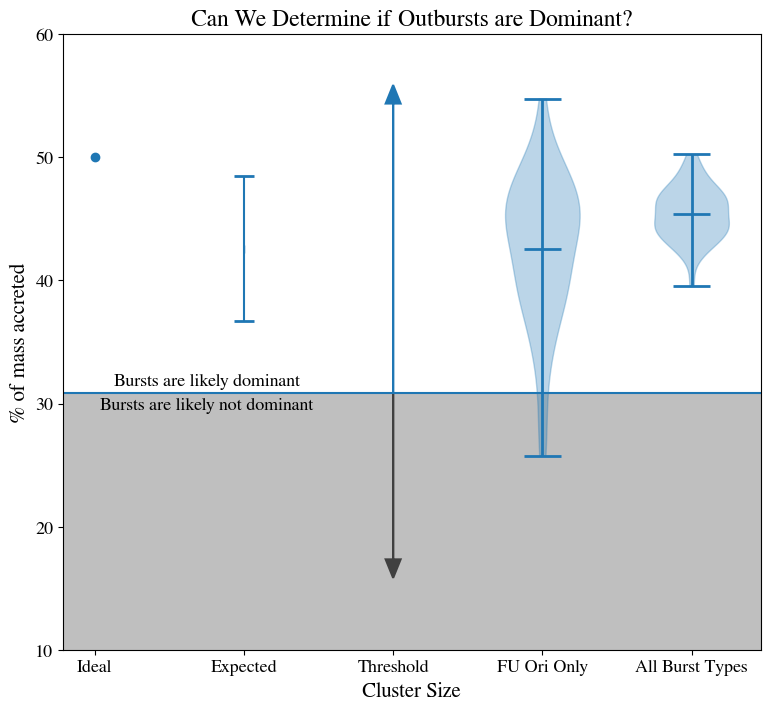

In [20]:
fig,ax1=plt.subplots()
fig.set_size_inches(9,8)
plt.rcParams['text.usetex']='False'
plt.rcParams['font.family']='FreeSerif'
plt.rcParams['axes.labelweight']='normal'
plt.rcParams['font.weight']='normal'

ax1.scatter(ideal_x,ideal_y)
ax1.errorbar(expected_x,expected_y,yerr=expected_yerr,fmt='|',linewidth=1.5,capsize=7,capthick=2,color='#1f77b4')
ax1.axhline(30.85)
ax1.arrow(2,30.85,dx=0,dy=25,length_includes_head=True,linewidth=1.5,head_width=0.1,head_length=1.5,color='#1f77b4')
ax1.arrow(2,30.85,dx=0,dy=-15,length_includes_head=True,linewidth=1.5,head_width=0.1,head_length=1.5,color='black')
ax1.axhspan(0, 30.85, facecolor='grey', alpha=0.5)


v0=ax1.violinplot(frac100_2000_1bin,positions=[3],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v0['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v0[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 
    
v5=ax1.violinplot(burst_frac,positions=[4],vert=True, widths=0.5, showmeans=True, showextrema=True)
for pc in v5['bodies']:
    pc.set_facecolor('#1f77b4')
    pc.set_edgecolor('#1f77b4')
    pc.set_alpha(0.3)
for partname in ('cbars','cmins','cmaxes','cmeans',):
    vp=v5[partname]
    vp.set_edgecolor('#1f77b4')
    vp.set_linewidth(2) 

ax1.text(0.75,31.5,'Bursts are likely dominant',fontsize=13,ha='center')
ax1.text(0.75,29.5,'Bursts are likely not dominant',fontsize=13,ha='center')


ax1.set_xticklabels(['0','Ideal','Expected','Threshold','FU Ori Only','All Burst Types'])
ax1.set_ylabel('% of mass accreted',fontsize=15)
ax1.set_xlabel('Cluster Size',fontsize=15)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
ax1.set_ylim(10,60)
ax1.set_title('Can We Determine if Outbursts are Dominant?',fontsize=17)
plt.savefig('/home/lee/research/figs/observational/threshold_fig.jpeg',dpi=300,bbox_inches='tight')
plt.show() 

In [29]:
print(np.min(burst_frac))

39.527214277796254


In [27]:
number=0
for i in range(len(burst_frac)):
    if burst_frac[i]>=30.8:
        number+=1

In [28]:
print(number/50)

1.0
